In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Create the dataset

In [3]:
#Input data
X = torch.linspace(1,50,50).reshape((-1,1))
X.shape

torch.Size([50, 1])

In [4]:
#Generate noise to add to the output
torch.manual_seed(71)
e=torch.randint(-8,9,(1,50)).reshape(50,-1).type(torch.float32)

In [5]:
#Output training data to include noise
y=2*X+1+e

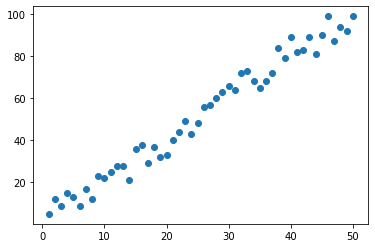

In [6]:
plt.scatter(X.numpy(),y.numpy())

### Building the model

#### A. Simple non-class based model to assess non-learning weights

In [7]:
torch.manual_seed(59)
lin_model=nn.Linear(1,1)
print(lin_model.weight)
print(lin_model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [8]:
for name,param in lin_model.named_parameters():
    print(name , param.item())

weight 0.10597813129425049
bias 0.9637961387634277


In [9]:
y_pred=lin_model.weight.item()*X+lin_model.bias.item()

torch.Size([50, 1])

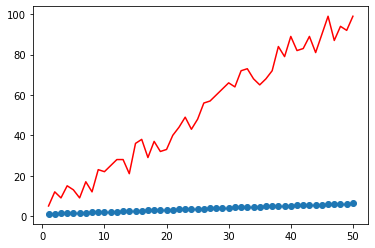

In [10]:
#Compare unlearnt y_pred (blue) against expected y (red)
plt.scatter(np.linspace(1,50,50),y_pred.numpy())
plt.plot(np.linspace(1,50,50),y.numpy(),'r')
y.shape

#### B. Building the complete learning model
1. Build the Model class with attributes, the Linear class and the forward function
2. Initiate the loss function
3. Initiate the optimizer function
4. For 'n' number of epochs, run the full model
5. Create a train function that automates (4)

In [11]:
#1. Build the Model class with attributes, the Linear class and the forward function
class LinModel(nn.Module):
    def __init__(self, input_features, output_features):
        super().__init__()
        self.input_features=input_features
        self.output_features=output_features
        self.linear=nn.Linear(input_features,output_features)
    
    def forward(self,X):
        y_pred=self.linear(X)
        return y_pred

In [12]:
#Instantiate object of Model class
torch.manual_seed(59)
model=LinModel(1,1)
print(model)
print('Weight: ',model.linear.weight.item())
print('Bias: ',model.linear.bias.item())

LinModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
Weight:  0.10597813129425049
Bias:  0.9637961387634277


In [13]:
#2. Initiate loss function
criterion=nn.MSELoss()

In [14]:
#3. Initiate optimizer function
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)

#4. Putting it all together
epochs=50
losses=[]
for e in range(epochs):
    e+=1
    y_pred=model.forward(X)
    loss=criterion(y_pred,y)
    
    losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
    print('for epoch {}, the loss is {}, the weights are {} and the bias is {}'.format(e,loss,model.linear.weight.item(),model.linear.bias.item()))

#Reviewing loss movement
plt.plot(range(e),losses)

#Calculating the predicted values based on model weights
y_pred2=model.linear.weight.item()*X + model.linear.bias.item()

#Plotting actual vs. predicted
plt.scatter(X,y_pred2)
plt.plot(X,y,'r')

In [15]:
# 5. Automate 4 into a single function
def train(X,y,model,epochs, optimizer,criterion):
    losses=[]
    for e in range(epochs):
        y_pred=model.forward(X)
        loss=criterion(y_pred,y)
        losses.append(loss)
        if e%5==0:
            print('Loss for epoch {} is {} and the weight is {} and the bias is {}'.format(e,loss,model.linear.weight.item(),model.linear.bias.item()))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses,model.linear.weight.item(),model.linear.bias.item() 
    

In [16]:
# epochs=50
# result=train(X,y,model,epochs,optimizer,criterion)

In [17]:
# losses,weights,bias=result

In [18]:
# y_pred3=weights*X+bias
# print(type(y_pred3))

In [19]:
# plt.scatter(X,y_pred3)
# #plt.plot(X,y_pred2,'g')
# plt.plot(X,y,'r')

In [20]:
def review_test(X,y,result,epochs):
    losses=result[0]
    weight=result[1]
    bias=result[2]
    plt.plot(range(epochs),losses)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.show()
    
    y_pred=weight*X+bias
    plt.plot(X,y,'r')
    plt.scatter(X,y_pred)
    plt.show()

In [21]:
#review_test(X,y,result,epochs)

In [22]:
def run(X,y,model,epochs,optimizer,criterion):
    result=train(X,y,model,epochs,optimizer,criterion)
    review_test(X,y,result,epochs)
    return result[1],result[2]

Loss for epoch 0 is 3057.216796875 and the weight is 0.10597813129425049 and the bias is 0.9637961387634277
Loss for epoch 5 is 132.4291229248047 and the weight is 2.3446059226989746 and the bias is 1.0339646339416504
Loss for epoch 10 is 25.162382125854492 and the weight is 1.9157683849334717 and the bias is 1.0248701572418213
Loss for epoch 15 is 21.22591781616211 and the weight is 1.997764229774475 and the bias is 1.030944585800171
Loss for epoch 20 is 21.07901382446289 and the weight is 1.981933355331421 and the bias is 1.034103512763977
Loss for epoch 25 is 21.07110595703125 and the weight is 1.9848365783691406 and the bias is 1.037810206413269
Loss for epoch 30 is 21.068307876586914 and the weight is 1.984152913093567 and the bias is 1.0414016246795654
Loss for epoch 35 is 21.06570816040039 and the weight is 1.9841564893722534 and the bias is 1.0450047254562378
Loss for epoch 40 is 21.063125610351562 and the weight is 1.984028697013855 and the bias is 1.0485951900482178
Loss for 

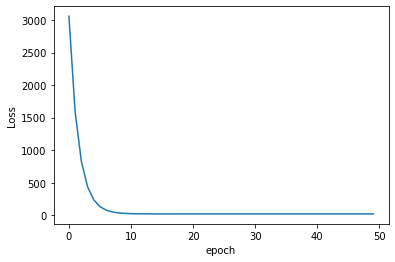

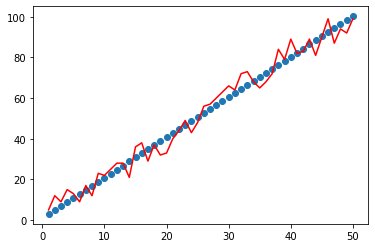

(1.9838191270828247, 1.0557515621185303)

In [23]:
epochs=50
run(X,y,model,epochs,optimizer,criterion)